### NME 1 — Saturday, October 21st, 2023
# data collection and cleaning with Jupyter, Python, NumPy and pandas 

## introduction to Jupyter Notebook

Jupyter Notebook is a really easy and user friendly way to experiment with Python code, combining code with notes and documentation. You can do all of this without having use the command line, and the resulting file can be easily published and shared with other people.

An Jupyter Notebook consists of a number of "cells," stacked on the page from top to bottom. Cells can have text or code in them. You can change a cell's type using the "Cell" menu at the top of the page; go to Cell > Cell Type and select either Code for Python code or Markdown for text. (You can also change this for the current cell using the drop-down menu in the toolbar.)

#### Text Cells
First make a new cell which can be done in different ways: you can make a new cell at the top of the page in Jupyter Notebook or press a (above) or b (below) depending on the location you want the cell to be. Next change its type to Markdown and then type some stuff and click run. Jupyter Notebook will "render" the text and display it on the page in rendered format. You can hit Enter or click in the cell to edit its contents again. Text in Markdown cells is rendered according to a set of conventions called [Markdown](https://www.markdownguide.org/cheat-sheet/), a language for marking up text using formatting instructions.


#### Code Cells

First make a new cell (see above directions). Then change its type to Code and begin typing Python. 

_**Note: this notebook is largely based off Dana Gong's 'Intro Sprint' from CDJ in FA21.**_

In [2]:
print("This is a code cell.")
print("")
print("Any Python code you type in this cell will be run when you press the 'Run' button,")

This is a code cell.

Any Python code you type in this cell will be run when you press the 'Run' button,


You can define variables or import modules in one code cell and it will be available for you to in all subsequent code cells.

In [3]:
import random
animals = ["dog", "cat", "elephant", "zebra"]

Now, you can use the list of animals and the random module in the cell below.

In [4]:
print(random.choice(animals))

cat


## python Modules

Modules refer to a file containing Python statements and definitions. Above, we imported the random module which has many functions for randomizing distributions of numbers. We used the choice function which returns a random element from a sequence.

### importing packages
Python can't do everything, sometimes its helpful to import packages. Read more about the pacakges used in this notebook below. 

**Documentation:**
- [NumPy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/3.1.1/contents.html)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## data collection

For the purposes of our introductory sprint, we will be collecting data either through importing a csv file (comma seperated values, a type of file that can hold data) or web scraping (specifically with social media), but we will focus on web scraping in a later notebook.

In this, we will be using a dataset on poverty measures in New York City. This data was downloaded from [NYC Open Data](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/cts7-vksw).

In [6]:
poverty = pd.read_csv('nyc_poverty_2018.csv')
poverty.head()

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


We can use the head function to show the first five rows of the dataset (or tail to show the last five rows). We can also use the shape function to see the dimensions of our dataset.

In [7]:
display(poverty.head())
print(poverty.shape)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


(68273, 61)


After looking at our data, we can see that we have a ton of columns (61), and the columns don't seem to have very self explanatory names. On the NYC Open Data website, the dataset comes with a data dictionary that explains the columns. If you want, you can look at all the column descriptions. But, for our purposes, we will just show you how to rename them and drop unnecassry columns.

We will drop uncessary columns by only selecting the ones we want to keep. There are many more ways to drop columns that you can search up.

In [8]:
poverty = poverty[['AgeCateg', 'Boro','CitizenStatus', 'EducAttain', 'EST_Childcare', 'NYCgov_Income',
                   'EST_PovGap','EST_PovGapIndex', 'Ethnicity']]
poverty.head()

,AgeCateg,Boro,CitizenStatus,EducAttain,EST_Childcare,NYCgov_Income,EST_PovGap,EST_PovGapIndex,Ethnicity
0,2,2,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,3,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,3,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,2,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,2,2,1.0,0.0,117058.230,0.0,0.0,1


Now, let's rename our columns into something more descriptive and drop all rows with na values.

In [9]:
poverty=poverty.copy()
poverty.rename(columns = {'AgeCateg' : 'age', 
                          'Boro' : 'borough', 
                          'CitizenStatus' : 'citizen', 
                          'EducAttain' : 'education',
                          'EST_Childcare' : 'childcare', 
                          'EST_PovGap' : 'pov_gap', 
                          'EST_PovGapIndex' : 'pov_gap_index',
                          'Ethnicity' : 'ethnicity', 
                          'NYCgov_Income': 'income'},
               inplace = True)
poverty.dropna()
poverty.head()

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_index,ethnicity
0,2,2,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,3,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,3,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,2,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,2,2,1.0,0.0,117058.230,0.0,0.0,1


Looking at the rows of these columns seems quite undescriptive as well. In our data dictionary, we can see that each number corresponds to a different category for each column.

For example, in borough:
1 = Bronx, 2 = Brooklyn, 3 = Manhattan, 4 = Queens, 5 = Staten Island

Let's replace our values with their categorical values. There are many ways to do this, but in this example we use a [for loop](https://wiki.python.org/moin/ForLoop) to loop through all the values in the column and append their string values to an array based on their condition.

In [10]:
borough = []
for x in poverty['borough']:
    if x == 1:
        borough.append('Bronx')
    if x == 2:
        borough.append('Brooklyn')
    if x == 3:
        borough.append('Manhattan')
    if x == 4:
        borough.append('Queens')
    if x == 5:
        borough.append('Staten Island')
poverty['borough'] = borough
poverty.head()

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_index,ethnicity
0,2,Brooklyn,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,Manhattan,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,Manhattan,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,Brooklyn,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,Brooklyn,2,1.0,0.0,117058.230,0.0,0.0,1


So now we can see that our borough values are populated with meaningful words! We'll show a few more examples, and if you want you can try the remaining column on your own. For childcare, income, and poverty gap, these are dollar amounts so we do not have to alter them.

In [11]:
# age
age = []
for x in poverty['age']:
    if x == 1:
        age.append('>18')
    if x == 2:
        age.append('18-64')
    if x == 3:
        age.append('65+')
poverty['age'] = age
poverty.head()

# citizen
citizen = []
for x in poverty['citizen']:
    if x == 1:
        citizen.append('citizen')
    if x == 2:
        citizen.append('citizen')
    if x == 3:
        citizen.append('noncitizen')
poverty['citizen'] = citizen

In [12]:
poverty.head()

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_index,ethnicity
0,18-64,Brooklyn,citizen,4.0,0.0,81417.961,0.0,0.0,4
1,18-64,Manhattan,citizen,4.0,0.0,228417.950,0.0,0.0,1
2,65+,Manhattan,citizen,3.0,0.0,228417.950,0.0,0.0,1
3,65+,Brooklyn,citizen,1.0,0.0,117058.230,0.0,0.0,1
4,18-64,Brooklyn,citizen,1.0,0.0,117058.230,0.0,0.0,1


## introduction to data viz

We use data visualization to help to tell stories by curating data into a form easier to understand, displaying trends, relationships, outliers. They not only are beautiful, but are functional.

Let's start with exploring some of the relationships between the variables in our new, cleaned dataframe. We have two measures of poverty in this - the poverty gap, and poverty gap ratio.

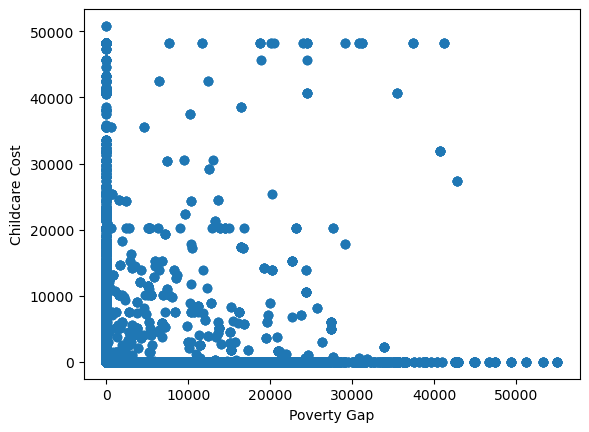

In [13]:
plt.scatter(poverty['pov_gap'], poverty['childcare'])
plt.xlabel('Poverty Gap')
plt.ylabel('Childcare Cost')
plt.show()

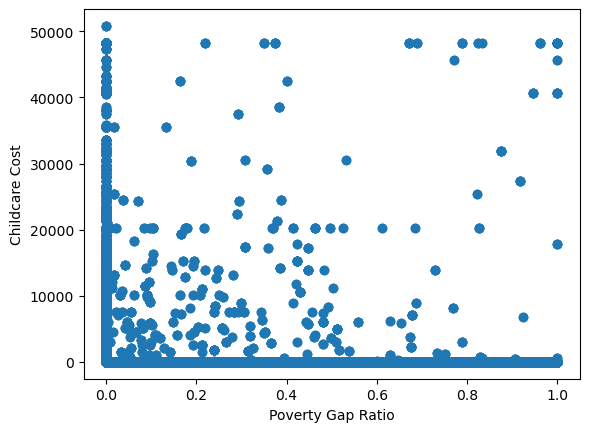

In [14]:
plt.scatter(poverty['pov_gap_index'], poverty['childcare'])
plt.xlabel('Poverty Gap Ratio')
plt.ylabel('Childcare Cost')
plt.show()

How do we choose which two measures to use for analysis? Let's look at the definitions from our [data dictionary](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/cts7-vksw).

> The **poverty gap** is a dollar measure of resources needed to escape poverty (determined from the family head). The **poverty gap index** captures the intensity of poverty - the difference in economic well-being as individuals get closer to (or surpass) their poverty threshold. It is possible for populations with similar poverty rates to have divergent poverty gap indexes.

For our purposes, there is not that much of a difference between using the two, but since the index is used at the individual (not family) level, and a more common mode of comparison of economic well-being, we will use the poverty gap index from now on.

To better visualize our data, import [seaborn](https://seaborn.pydata.org/) (a data visualization library built on top of matplot lib).

In [15]:
import seaborn as sns
# if you don't have seaborn type !pip install seaborn into this notebook or pip install seaborn into your terminal.

Let's look at where childcare cost and the poverty gap ratio does not equal 0 and display it colored by borough.

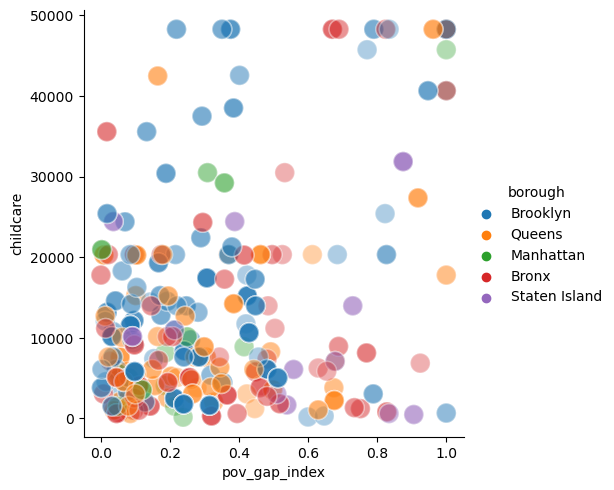

In [16]:
poverty_childcare =  poverty[(poverty['pov_gap_index'] > 0) & (poverty['childcare'] > 0)]
sns.relplot(x='pov_gap_index', y='childcare', hue="borough", s=200, alpha=.2, data=poverty_childcare);

We can visually separate the boroughs as well and include a line of best fit to explore our data in greater detail. We will use an [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to achieve this. You can look at the documentation to see what the parameters mean.

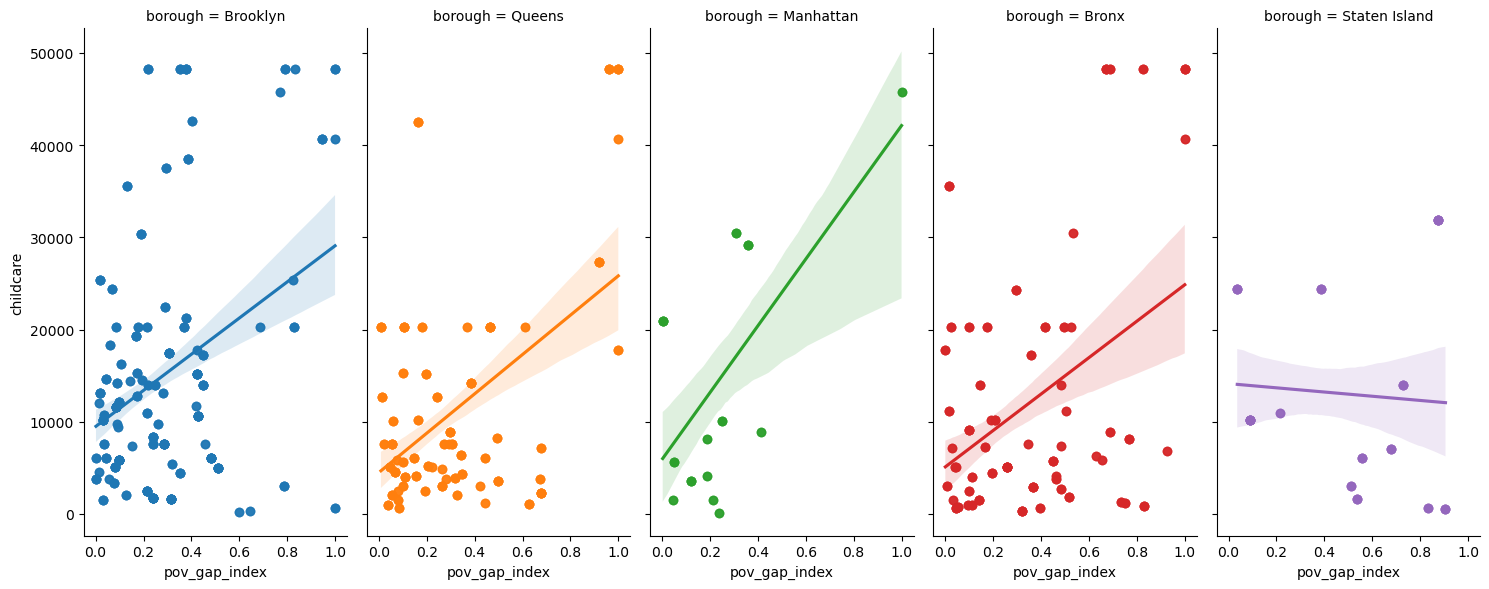

In [17]:
sns.lmplot(x='pov_gap_index', y='childcare', hue ='borough',col='borough',
               data=poverty_childcare, height=6, aspect=.5)

plt.show()

As we can see, as the poverty gap index (or ratio) increases, childcare costs increase for most boroughs. It costs quite a bit to raise a child in NYC, and that has a [significant effect](https://www.refinery29.com/en-us/2014/08/73114/raising-kid-in-nyc-cost-expensive) on a family's ability to escape poverty.

Let's look at one more different type of graph before you explore them on your own.

In [18]:
citizen = poverty.groupby("citizen")

citizen_mean = citizen.mean()

# make the index a column so we can graph with the column
citizen_mean['citizen'] = ['citizen', 'noncitizen']

display(citizen_mean)

/var/folders/rm/gqj3q3l57t750tlx1ms2cfd80000gn/T/ipykernel_27683/2740612809.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  citizen_mean = citizen.mean()


,education,childcare,income,pov_gap,pov_gap_index,ethnicity,citizen
citizen,,,,,,,
citizen,2.573523,1227.066037,81329.769868,1677.255033,0.059923,2.309725,citizen
noncitizen,2.357325,794.640539,66007.988879,2454.285344,0.088022,2.886361,noncitizen


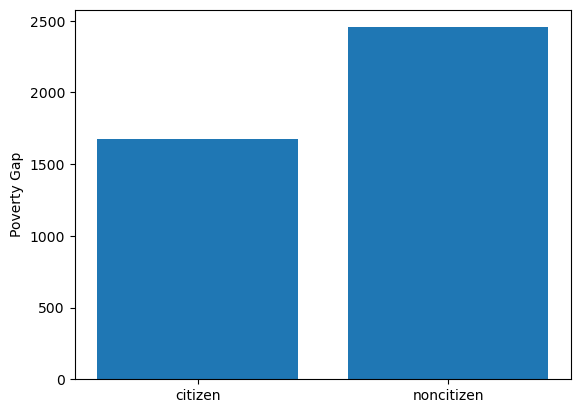

In [19]:
plt.bar(x=citizen_mean['citizen'], height=citizen_mean['pov_gap'])
plt.ylabel('Poverty Gap')
plt.show()

That's it! This is just a quick dip into the world of data visualization and data analysis. Feel free to explore more with this [dataset](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/cts7-vksw) - select more columns to look at, different types of visualizations, etc... or try finding a completely different dataset on a topic you want to explore! Have fun with it :)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

graduation = pd.read_csv('Texas_Graduation_Data.csv')

In [23]:
display(graduation.head())
print(graduation.shape)

,COUNTY,CNTYNAME,CNTY_ALLD,CNTY_ALLN_CMP2,CNTY_ALLN_GRAD,CNTY_ALLN_CONT,CNTY_ALLN_TXCHSE,CNTY_ALLN_DROP,CNTY_ALLR_CMP2,CNTY_ALLR_GRAD,...,CNTY_TTLN_GRAD,CNTY_TTLN_CONT,CNTY_TTLN_TXCHSE,CNTY_TTLN_DROP,CNTY_TTLR_CMP2,CNTY_TTLR_GRAD,CNTY_TTLR_CONT,CNTY_TTLR_TXCHSE,CNTY_TTLR_DROP,CNTY_TTLR_RAED
0,1,ANDERSON COUNTY,559,556,542,12,2,3,99.5,97.0,...,441,6,1,1,99.8,98.2,1.3,0.2,0.2,95.9
1,2,ANDREWS COUNTY,290,281,274,7,0,9,96.9,94.5,...,254,0,0,4,98.4,98.4,0.0,0.0,1.6,95.3
2,3,ANGELINA COUNTY,"1,225","1,154","1,141",11,2,71,94.2,93.1,...,606,4,2,14,97.8,96.8,0.6,0.3,2.2,88.4
3,4,ARANSAS COUNTY,249,243,237,3,3,6,97.6,95.2,...,237,3,3,6,97.6,95.2,1.2,1.2,2.4,78.9
4,5,ARCHER COUNTY,159,159,159,0,0,0,100.0,100.0,...,0,0,0,0,.,.,.,.,.,.


(252, 398)


In [24]:
graduation = graduation[['COUNTY','CNTYNAME','CNTY_ALLD','CNTY_ALLR_GRAD','CNTY_ALLR_DROP','CNTY_MALD', 'CNTY_MALR_GRAD', 'CNTY_FEMD', 'CNTY_FEMR_GRAD']]
graduation.head()

,COUNTY,CNTYNAME,CNTY_ALLD,CNTY_ALLR_GRAD,CNTY_ALLR_DROP,CNTY_MALD,CNTY_MALR_GRAD,CNTY_FEMD,CNTY_FEMR_GRAD
0,1,ANDERSON COUNTY,559,97.0,0.5,289,96.9,270,97.0
1,2,ANDREWS COUNTY,290,94.5,3.1,151,92.7,139,96.4
2,3,ANGELINA COUNTY,"1,225",93.1,5.8,615,91.5,610,94.8
3,4,ARANSAS COUNTY,249,95.2,2.4,132,95.5,117,94.9
4,5,ARCHER COUNTY,159,100.0,0.0,89,100.0,70,100.0


In [25]:
graduation=graduation.copy()
graduation.rename(columns= {'COUNTY' : 'County',
                         'CNTYNAME' : 'County Name',
                         'CNTY_ALLD' : 'Students',
                         'CNTY_ALLR_GRAD' : 'Grad',
                         'CNTY_ALLR_DROP' : 'Drop',
                         'CNTY_MALD' : 'Males',
                         'CNTY_MALR_GRAD' : 'Males Grad',
                         'CNTY_FEMD' : 'Females',
                         'CNTY_FEMR_GRAD' : 'Females Grad'},
               inplace = True)
graduation.head()

,County,County Name,Students,Grad,Drop,Males,Males Grad,Females,Females Grad
0,1,ANDERSON COUNTY,559,97.0,0.5,289,96.9,270,97.0
1,2,ANDREWS COUNTY,290,94.5,3.1,151,92.7,139,96.4
2,3,ANGELINA COUNTY,"1,225",93.1,5.8,615,91.5,610,94.8
3,4,ARANSAS COUNTY,249,95.2,2.4,132,95.5,117,94.9
4,5,ARCHER COUNTY,159,100.0,0.0,89,100.0,70,100.0


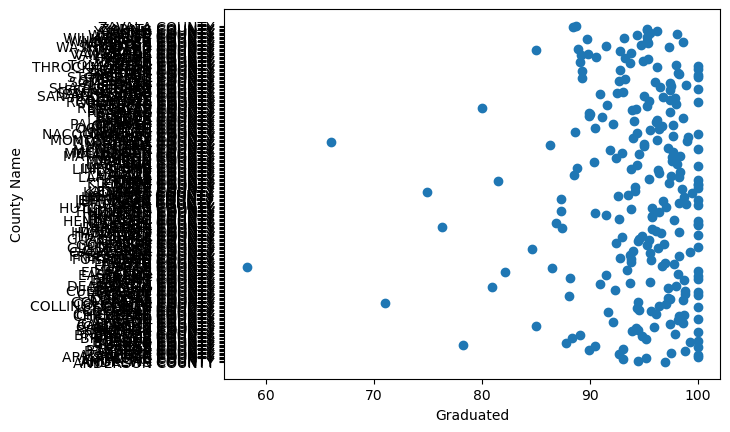

In [26]:
plt.scatter(graduation['Grad'], graduation['County Name'])
plt.xlabel('Graduated')
plt.ylabel('County Name')
plt.show()

In [27]:
column_name = 'Students'
graduation['Students'] = graduation['Students'].str.replace(',','').astype(int)

if column_name in graduation.columns:
    graduation.drop(graduation[graduation[column_name] < 5000].index,
                    inplace = True)

graduation['Students']

13      5610
14     24951
19      5310
30      7525
42     17310
56     37572
60     10377
70     13945
78      9472
83      6158
100    64749
107    16390
167     8671
217    26471
224    12485
243     9535
Name: Students, dtype: int64

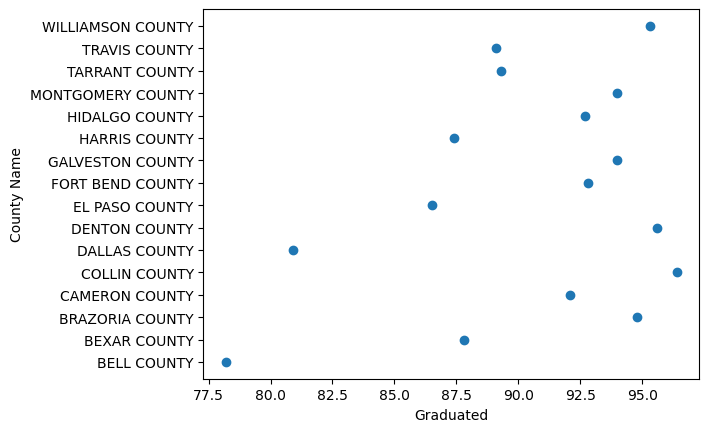

In [29]:
plt.scatter(graduation['Grad'], graduation['County Name'])
plt.xlabel('Graduated')
plt.ylabel('County Name')
plt.show()

In [31]:
plt.bar(x=citizen_mean['citizen'], height=citizen_mean['pov_gap'])
plt.ylabel('Poverty Gap')
plt.show()

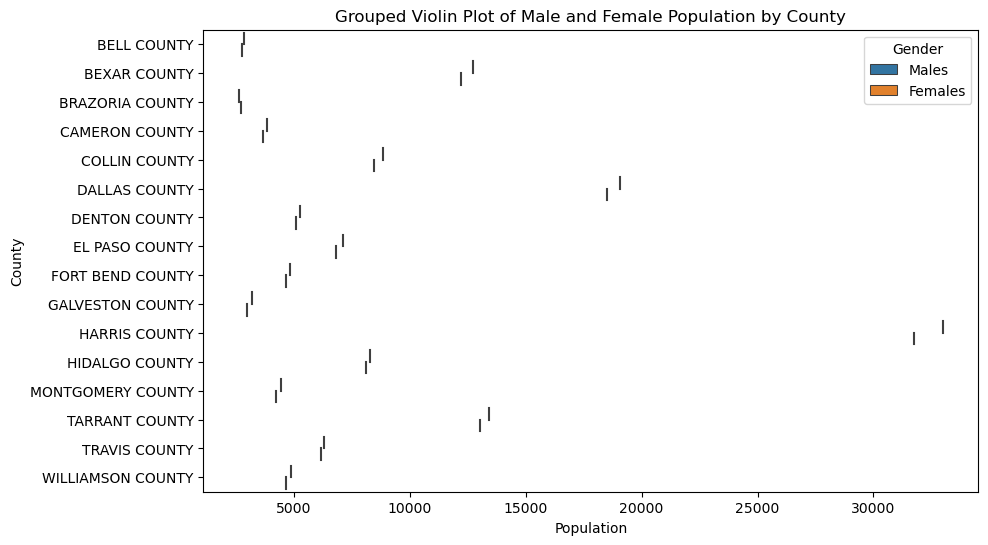

In [38]:
import seaborn as sns

#graduation['Males'] = graduation['Males'].str.replace(',','').astype(int)
#graduation['Females'] = graduation['Females'].str.replace(',','').astype(int)

df = pd.DataFrame(graduation)
df_melted = pd.melt(graduation, id_vars=['County Name'], value_vars=['Males','Females'], var_name = 'Gender', value_name='Population')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Population', y='County Name', hue='Gender', data=df_melted, split=True, inner='quart')
plt.title('Grouped Violin Plot of Male and Female Population by County')
plt.xlabel('Population')
plt.ylabel('County')
plt.legend(title='Gender', loc='upper right')
plt.show()

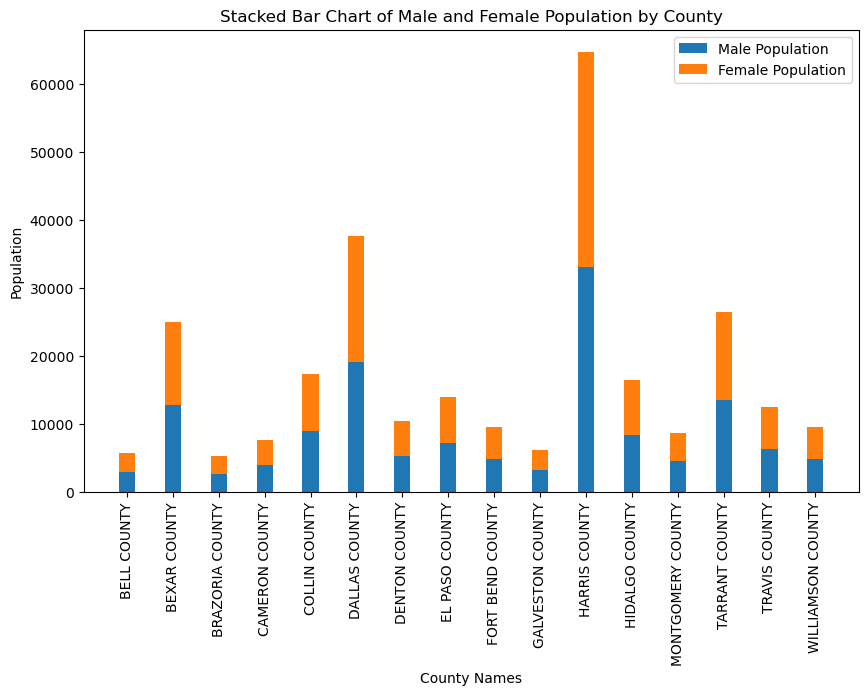

In [41]:
plt.figure(figsize=(10, 6))
counties = graduation['County Name']
male_population = graduation['Males']
female_population = graduation['Females']
width = 0.35

plt.bar(counties, male_population, width, label='Male Population')
plt.bar(counties, female_population, width, label='Female Population', bottom=male_population)

plt.xlabel('County Names')
plt.ylabel('Population')
plt.title('Stacked Bar Chart of Male and Female Population by County')
plt.legend()
plt.xticks(rotation=90)
plt.show()